In [7]:
import pytesseract
import cv2

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [13]:
# Set the font settings
font = cv2.FONT_HERSHEY_PLAIN
fontColor = (0,0,0)
lineType = 2

def get_text_and_boxes(im_path, text_together):
    '''
    this function reads the input image, fetches the text in it
    and draws boxes bounding the text.
    '''
    # load the input image
    image = cv2.imread(im_path)

    
    '''
    Error: “TesseractNotFound Error: tesseract is not installed or it's not in your path” 
    Solution: https://stackoverflow.com/questions/50951955/pytesseract-tesseractnotfound-error-tesseract-is-not-installed-or-its-not-i
    '''
    # mention the path of tesseract exe.
    pytesseract.pytesseract.tesseract_cmd = r'D:\Tesseract-OCR\tesseract.exe'
    
    # fetch the text from the image
    image_text = pytesseract.image_to_string(Image.open(im_path))
    print('Text', image_text)
    print()
    
    # get the bounding boxes for each text block
    boxes = pytesseract.image_to_data(Image.open(im_path), output_type=pytesseract.Output.DICT)
    print('Boxes', boxes)
    print()
    
    # get the needed bounding boxes
    lefts, tops, widths, heights, texts = [], [], [], [], []
    for conf, text, left, top, width, height in zip(
                                            boxes['conf'],
                                            boxes['text'],
                                            boxes['left'],
                                            boxes['top'],
                                            boxes['width'],
                                            boxes['height']):    
        # append the box only if it contains some text
        if conf != '-1' or text != '':
            # append left value
            lefts.append(left)
            # append top value
            tops.append(top)
            # append width value
            widths.append(width)
            # append height value
            heights.append(height)
            # append text value
            texts.append(text)
    
    # display the filtered values
    print('Lefts', lefts)
    print('Tops', tops)
    print('Widths', widths)
    print('Heights', heights)
    print('Texts', texts)
    print()
    
    # read image with OpenCV
    img = cv2.imread(im_path)
    h, w, _ = img.shape
    
    # iterate through the different box dimensions
    for i in range(len(lefts)):
        # populate (left, top) position of the box
        # and the width and height of the box
        (x, y, w, h) = (lefts[i], tops[i], widths[i], heights[i])
        # draw box with these values
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # check if text should be written together or individually
        if not text_together:
            # write text on the image in the corresponding (left, top) position
            cv2.putText(img, str(texts[i]), (lefts[i], tops[i]), font, 2, fontColor, lineType)        
    
    # check if text should be written together or individually
    if text_together:
        # write the whole text from the image in a position next to the first word
        cv2.putText(img, " ".join(texts), (lefts[1]-100, tops[1]-10), font, 1, fontColor, lineType) 
    
    '''
    cv2.imshow does not work in Jupyter notebook. Hence use matplotlib instead.
    https://stackoverflow.com/a/52061135
    '''
    # define the figure size
    figure(figsize=(8, 6), dpi=150)
    # plot the image with matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # axes are not needed for this image
    plt.axis('off')
    # show the plot
    plt.show()


Text To those who inspired it
and will not read it

 


Boxes {'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 0, 0, 1], 'left': [0, 200, 200, 200, 200, 224, 270, 308, 380, 211, 211, 250, 289, 323, 366, 0, 0, 0, 0], 'top': [0, 362, 362, 362, 363, 363, 362, 364, 365, 391, 391, 391, 395, 392, 392, 38, 38, 38, 38], 'width': [605, 193, 193, 193, 18, 40, 33, 68, 13, 169, 35, 34, 27, 39, 14, 53, 53, 53, 53], 'height': [605, 47, 47, 25, 17, 17, 19, 23, 16, 18, 18, 18, 14, 17, 17, 567, 567, 567, 567], 'conf': ['-1', '-1', '-1', '-1', 92, 95, 96, 96, 96, '-1', 96, 94, 94, 96, 96, '-1', '-1', '-1', 95], 'text': ['', '', '', '', 'To', 't

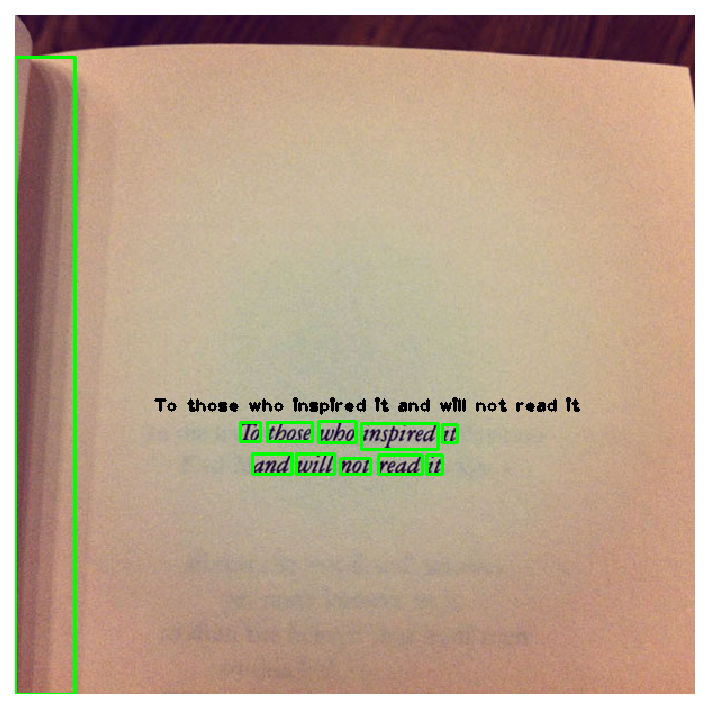

In [14]:
get_text_and_boxes('dedication.jpg', text_together=True)

Text Digital Humanities


Boxes {'level': [1, 2, 3, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1], 'word_num': [0, 0, 0, 0, 1, 2], 'left': [0, 22, 22, 22, 22, 460], 'top': [0, 82, 82, 82, 82, 87], 'width': [991, 949, 949, 949, 287, 511], 'height': [241, 112, 112, 112, 112, 79], 'conf': ['-1', '-1', '-1', '-1', 89, 86], 'text': ['', '', '', '', 'Digital', 'Humanities']}

Lefts [22, 460]
Tops [82, 87]
Widths [287, 511]
Heights [112, 79]
Texts ['Digital', 'Humanities']



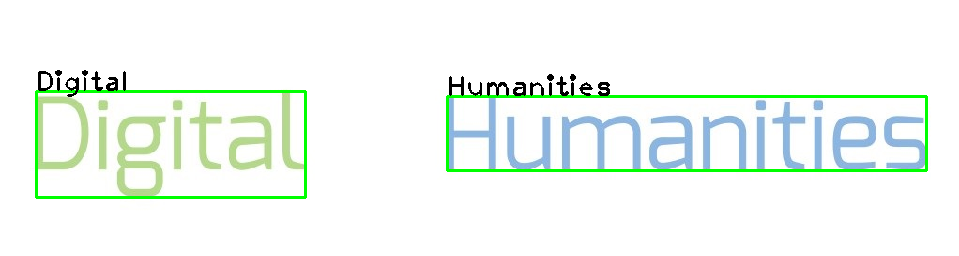

In [15]:
get_text_and_boxes('dh.jpg', text_together=False)